In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import pylab as pl
import numpy as np

from sklearn import linear_model

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split

from math import sqrt

In [2]:
# Cria um dataset chamado 'df' que receberá os dados do csv:

df = pd.read_csv("C:/Users/Allan/Documents/Projetos/FuelConsumptionCo2.csv")

In [3]:
#EXIBE A ESTRUTURA DO DATAFRAME:

print(df.head())

   MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Selecionar apenas as features do Motor e CO2

In [5]:
# Levará em consideração apenas essas duas variaveis:

motores =  df[['ENGINESIZE']] # Aqui é criado a váriavél (features) motores e dentro é jogado "ENGINESIZE"

co2 = df[['CO2EMISSIONS']] # E aqui é criado a váriavel co2



In [6]:
print(motores.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


In [7]:
print(co2.head())

   CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244


# Dividir o dataset em dados de treinamento e dados de teste, ainda levando apenas as duas variaveis em consideração.


In [8]:
# Neste casos vamos usar o train_test_split do scikitlearn

# Como teste o parametro é 20% e como treino 80%, os 80% serão confrontados com os resultados
# dos 20% para ver se está indo bem.

motores_treino, motores_test, co2_treino, co2_test = train_test_split(motores, co2, test_size=0.2, random_state=42)

print(type(motores_treino))



<class 'pandas.core.frame.DataFrame'>


# Exibir a correlação entre as features do dataset de treinamento

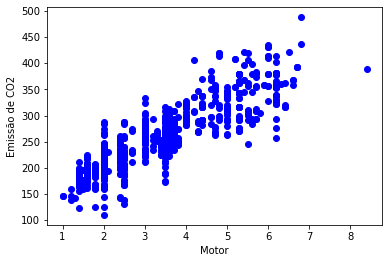

In [9]:
plt.scatter(motores_treino, co2_treino, color='blue') # Aqui estão os 80%
plt.xlabel("Motor")
plt.ylabel("Emissão de CO2")
plt.show()

# Vamos treinar o modelo de regressão linear

In [10]:
# CRIANDO UM MODELO DE TIPO DE REGRESSÃO LINEAR (Treino):

modelo = linear_model.LinearRegression() # Isso é Regressão Linear de MINIMOS QUADRADOS!

# TREINAR O MODELO USANDO O DATASET DE TESTE
# PARA ENCONTRAR O VALOR DE A E B (Y = A + B.X)

modelo.fit(motores_treino, co2_treino) # O comando "".fit" treina o modelo(ativa a regressão) levando em cosideração as 
                                       # duas variaveis (motores_treino e co2_treino)
    
# Basicamente aqui ele criou a formula Y = A + B.X

#!#!#!#! Apartir daqui o modelo já foi treinado #!#!#!#!


LinearRegression()

# Exibir os coeficientes (A e B)

In [11]:
# Feito o passo acima, foi criado um modelo onde o algoritmo da regressão linear foi usado, e nela foi determinado no
# grafíco as posições dos data points (acho) e nisto também foi criado o "intercepto" e a "inclinação"

print('(A) Intercepto: ', modelo.intercept_) # "Intercepto" é de onde sairá a reta do eixo Y.

print('(B) Inclinação: ', modelo.coef_) # E a "Inclinação" é a inclinação da reta no eixo Y (Intercepto)


#!#!#!#!#! Aqui está finalmente os valores de A e B (Y = A + B.x).


#                              A = Y (coluna) = 126.28970217
#                              B = X (coluna) = 38.99297872




(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


# Vamos exibir a nossa reta de regressão no dataset de treino

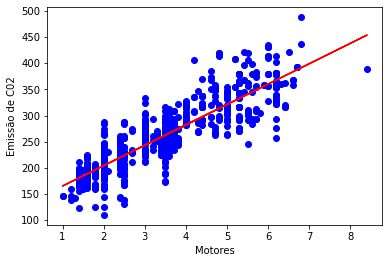

In [12]:
#!#! Lembrando que há dois modelos treinados,


# O modelo foi treinado na célula 19. Encontramos o valor de A e B, agora iremos ver o modelo treinado em um gráfico:

plt.scatter(motores_treino, co2_treino, color='blue')

plt.plot(motores_treino, modelo.coef_[0][0]*motores_treino + modelo.intercept_[0], '-r')

plt.ylabel("Emissão de C02")
plt.xlabel("Motores")

plt.show()

# Vamos executar o nosso modelo no dataset de teste

In [13]:
# Aqui será criada a variavél "predicoesCo2" que é o que eu quero descobrir.

# O modelo será treinado com o comando ".predict", sobre a variavel "motores_test", pois eu quero saber a emissão de
# Co2 que cada motor gera. E a variavel "motores_test" já tem os valores corretos (20%) e irá confrontar os dados
# do modelo.

predicoesCo2 = modelo.predict(motores_test) 


# Vamos exibir a nossa reta de regressão no dataset de teste¶


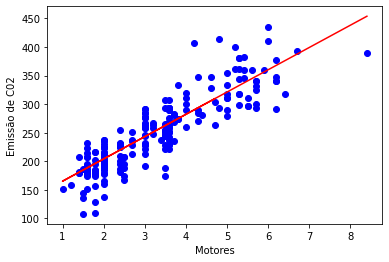

In [14]:
plt.scatter(motores_test, co2_test, color='blue')

plt.plot(motores_test, modelo.coef_[0][0]*motores_test + modelo.intercept_[0], '-r')

plt.ylabel("Emissão de C02")
plt.xlabel("Motores")
plt.show()

# Vamos avaliar o modelo¶

In [25]:
#Agora é mostrar as métricas:

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((predicoesCo2 - co2_teste)**2))

print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(co2_teste, predicoesCo2))

print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(co2_teste, predicoesCo2))

print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_teste, predicoesCo2)))

print("R2-score: %.2f" % r2_score(predicoesCo2 , co2_teste) )

Soma dos Erros ao Quadrado (SSE): 210991 
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
